<a href="https://colab.research.google.com/github/Tkag0001/Practice-ML-with-Digit-recognize-problem/blob/main/code/Train_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Recognizing handwritten digits
Data resources: https://keras.io/api/datasets/mnist/

#Connect to drive:

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Import packages:

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow

In [3]:
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Pandas: ",pd.__version__)
print("Mathplotlib: ",matplotlib.__version__)
print("Tensorflow: ",tensorflow.__version__)

Numpy version: 1.23.5
Seaborn version: 0.12.2
Pandas:  1.5.3
Mathplotlib:  3.7.1
Tensorflow:  2.14.0


#Loading the dataset:


In [30]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


#Visualize data

In [22]:
import collections

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


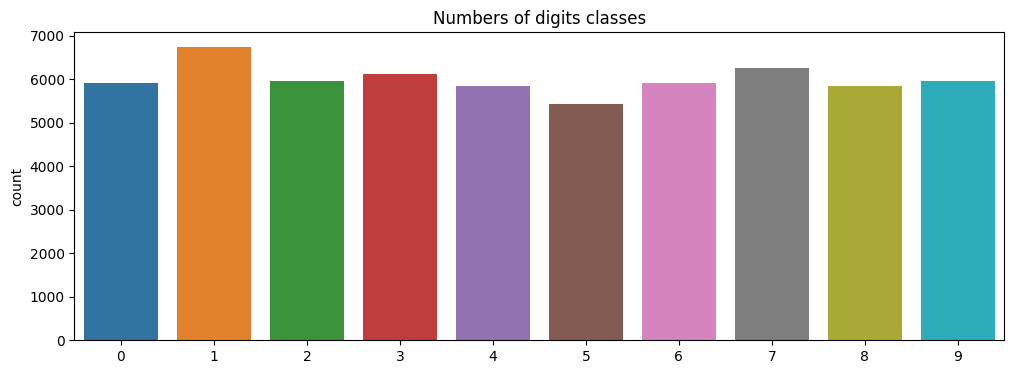

In [23]:
plt.figure(figsize=(12,4))
g = sns.countplot(x=y_train)
plt.title("Numbers of digits classes")
counter = collections.Counter(y_train)
print(counter)
plt.show()

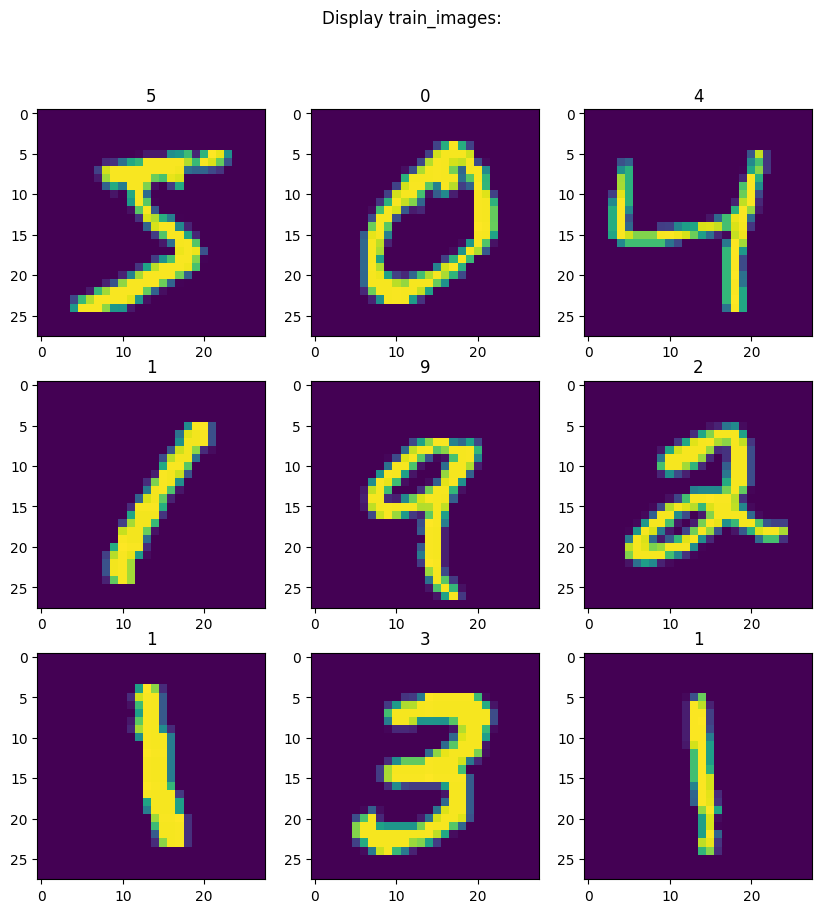

In [26]:
# Display images

fig, axs = plt.subplots(nrows= 3, ncols = 3, figsize = (10,10))
ax = axs.ravel()
for i in range(9):
  ax[i].imshow(X_train[i],aspect="auto")
  # title = y_train[i].astype(str)
  ax[i].set_title(y_train[i])
fig.suptitle("Display train_images:")
plt.show()

#Normalize, Reshape and Label Endcoding:
Why do we have to do them?

##Normalize data:


1.   We normalize data with grayscale to reduce the effect of illumination's differences.
2.   CNN model can work faster when we perform nomalization



In [31]:
test = X_test

In [32]:
X_train = X_train/255.0
test = test/255.0

print(f"X_train shape: {X_train.shape}")
print(f"Test shape: {test.shape}")

X_train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


##Reshape data:


1.   Train and test images are currently 2D matrix(28 x 28), we reshape all to 3D matrix(28 x 28 x 1)
2.   Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.



In [34]:
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (60000, 28, 28, 1)
y_train: (60000,)


##Label Encoding:
Encode labels to one hot vectors

In [35]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, num_classes = 10)

In [36]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#Train Test split


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.1,random_state =2)

In [38]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"\nX_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")


X_train.shape: (54000, 28, 28, 1)
y_train.shape: (54000, 10)

X_val.shape: (6000, 28, 28, 1)
y_val.shape: (6000, 10)


Text(0.5, 0.98, 'Data image')

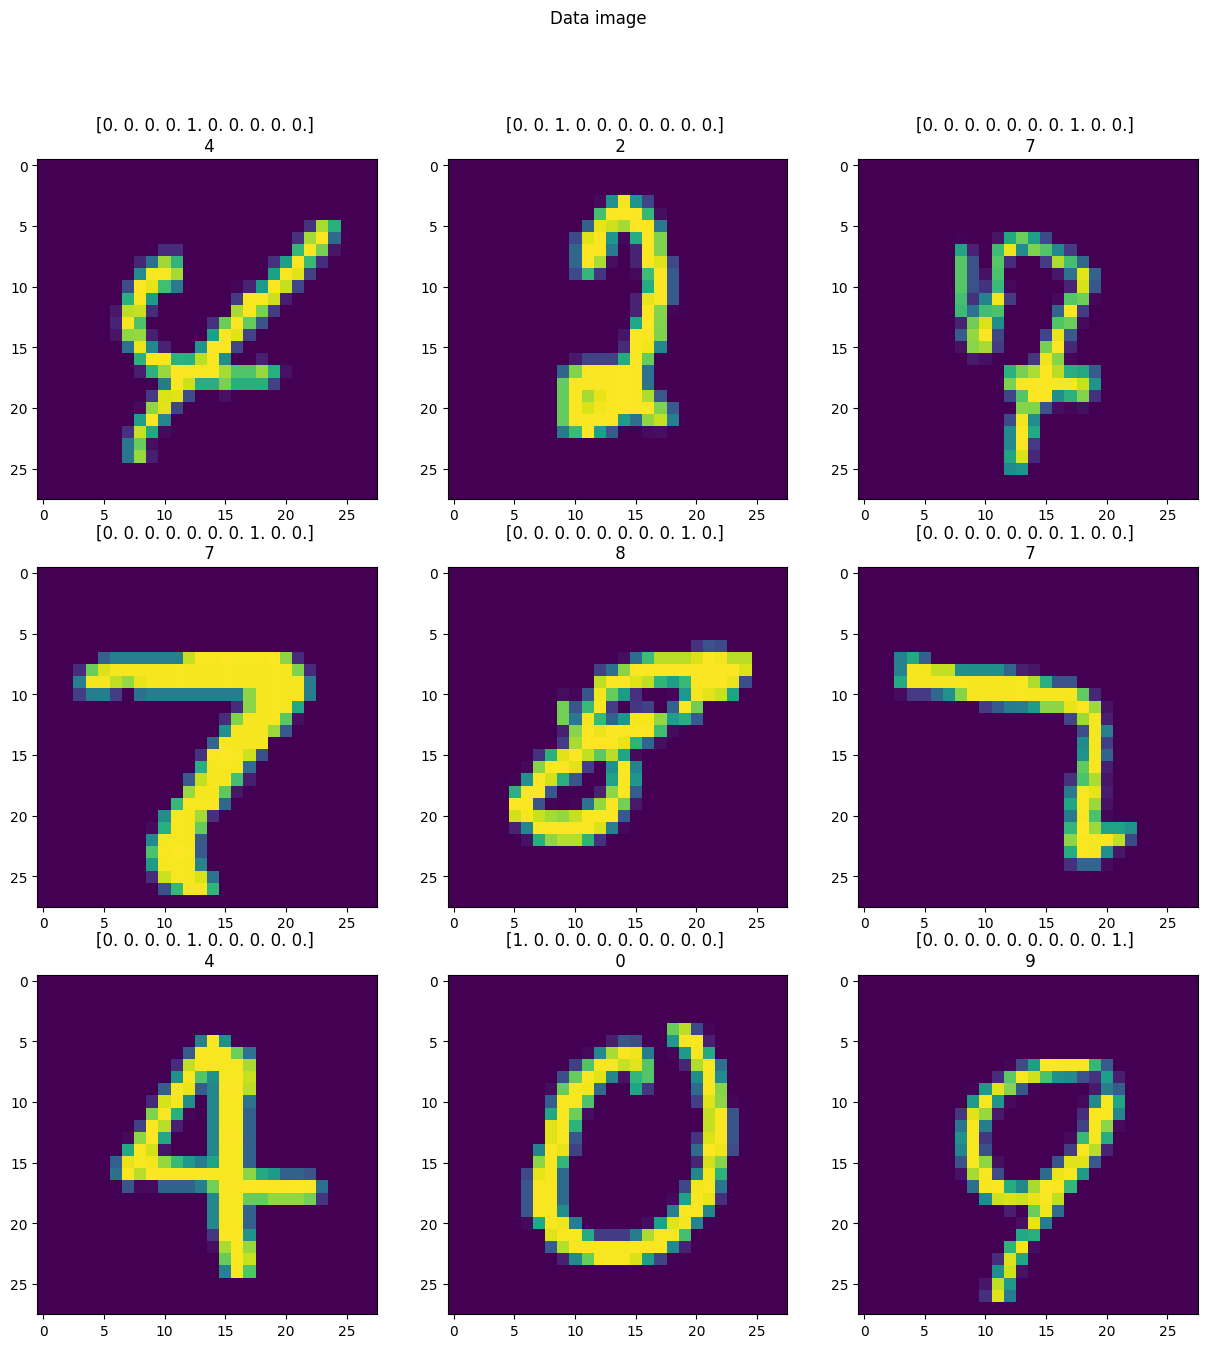

In [39]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(15,15))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(X_train[i][:,:,0])
  axs[i].set_title(f"{y_train[i]} \n {np.argmax(y_train[i])}")
fig.suptitle("Data image")

#Build model:

##Architecture of model:
 Conv2D  --> MaxPool2D --> Drop out --> Conv2D --> MaxPool2D
--> Drop out --> Fully connected(Relu, Softmax)









In [40]:
from sklearn.metrics import confusion_matrix
import itertools

In [41]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Create model:

In [42]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size= (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size= (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [43]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [44]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

###Epochs and Batch Size

In [45]:
epochs = 30
batch_size = 128 # 2^x

##Visualize model:

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

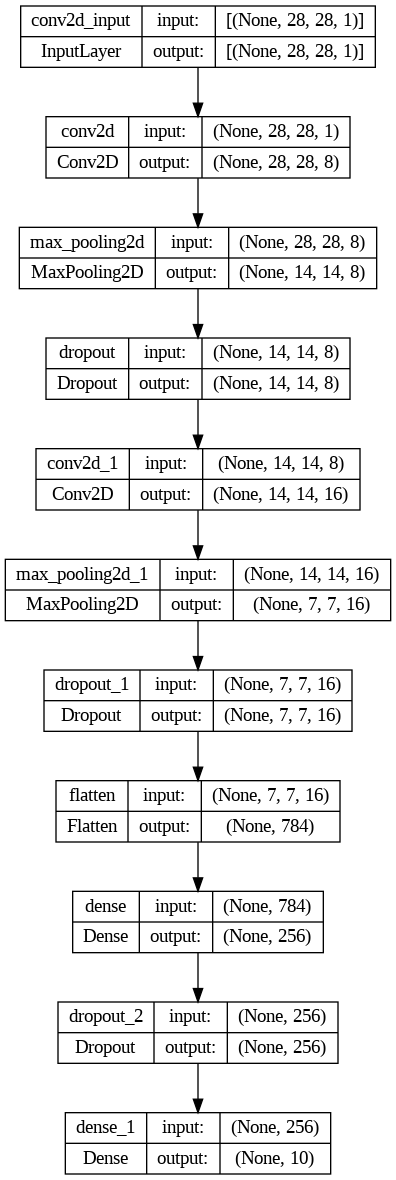

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'digits_model.png',show_shapes = True)

#Data augmentation:


*   We perform data augmentation to create more data in a lot of situation, then we can avoid overfiting data.
*   Ex: rotate image, zoom, cut, flip, ....
Note that: Don't flip vertically, becaue fliping vertically 6 is 9



In [48]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [49]:
print(X_train.shape)

(54000, 28, 28, 1)


In [50]:
history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,
                                validation_data = (X_val,y_val), steps_per_epoch = X_train.shape[0]//batch_size)

<ipython-input-50-33a387a8a4e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),epochs = epochs,


Epoch 1/30
421/421 [==============================] - 29s 44ms/step - loss: 0.7610 - accuracy: 0.7514 - val_loss: 0.1321 - val_accuracy: 0.9630
Epoch 2/30
421/421 [==============================] - 20s 48ms/step - loss: 0.3061 - accuracy: 0.9039 - val_loss: 0.0853 - val_accuracy: 0.9748
Epoch 3/30
421/421 [==============================] - 18s 43ms/step - loss: 0.2385 - accuracy: 0.9259 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 4/30
421/421 [==============================] - 19s 46ms/step - loss: 0.2013 - accuracy: 0.9379 - val_loss: 0.0583 - val_accuracy: 0.9818
Epoch 5/30
421/421 [==============================] - 20s 47ms/step - loss: 0.1824 - accuracy: 0.9442 - val_loss: 0.0554 - val_accuracy: 0.9825
Epoch 6/30
421/421 [==============================] - 18s 44ms/step - loss: 0.1649 - accuracy: 0.9499 - val_loss: 0.0463 - val_accuracy: 0.9840
Epoch 7/30
421/421 [==============================] - 20s 48ms/step - loss: 0.1518 - accuracy: 0.9538 - val_loss: 0.0427 - val_accuracy:

#Predicted test_data with model:


In [51]:
res = model.predict(test)

313/313 [==============================] - 1s 3ms/step


In [52]:
res = np.argmax(res, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

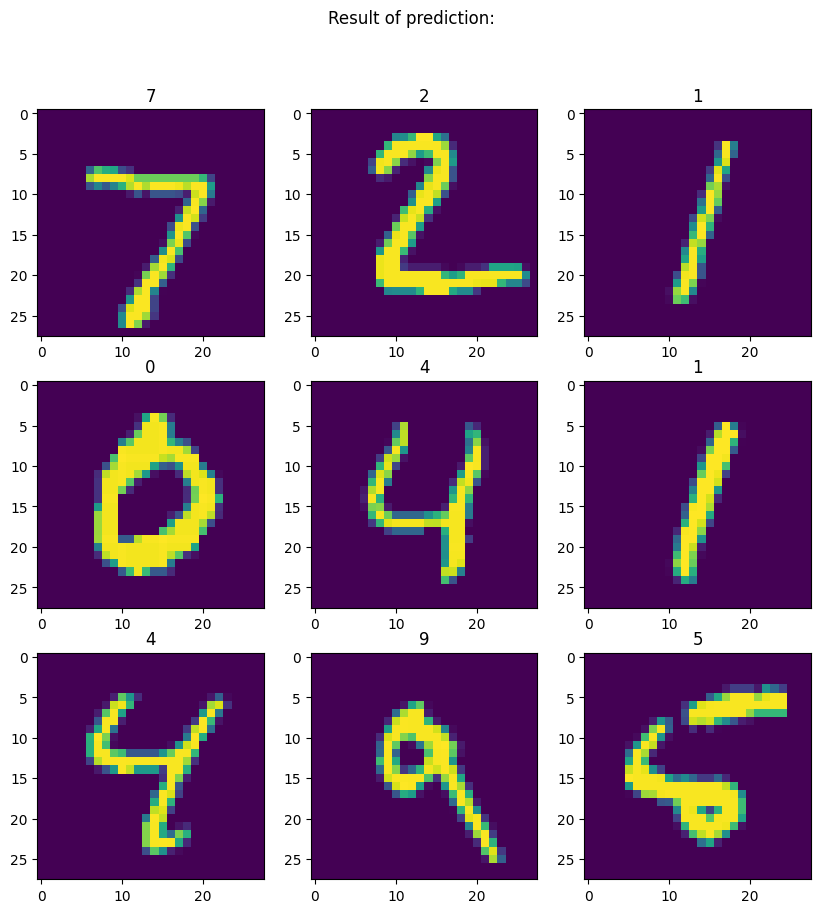

In [54]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,:])
  axs[i].set_title(res[i])
fig.suptitle("Result of prediction:")

##Evaluate model:
We will evaluate this model with loss and accuracy of validation data

In [55]:
history1.history

{'loss': [0.7610417008399963,
  0.3060528635978699,
  0.2385159134864807,
  0.2012944519519806,
  0.18238787353038788,
  0.16488026082515717,
  0.15181821584701538,
  0.1454247534275055,
  0.136403426527977,
  0.12950807809829712,
  0.1263371855020523,
  0.11624246835708618,
  0.11314095556735992,
  0.11523186415433884,
  0.11188317835330963,
  0.1092226505279541,
  0.10564795136451721,
  0.09966900199651718,
  0.10071784257888794,
  0.0987834483385086,
  0.09743869304656982,
  0.0980767011642456,
  0.09398383647203445,
  0.09181998670101166,
  0.0939541757106781,
  0.09019298106431961,
  0.09215458482503891,
  0.0873318538069725,
  0.09057991206645966,
  0.08566142618656158],
 'accuracy': [0.751447856426239,
  0.9039204120635986,
  0.9258798360824585,
  0.937852680683136,
  0.9441825151443481,
  0.9498626589775085,
  0.9538350105285645,
  0.9562667012214661,
  0.9586241245269775,
  0.9603133201599121,
  0.9613714218139648,
  0.9637288451194763,
  0.9654737114906311,
  0.96413719654083

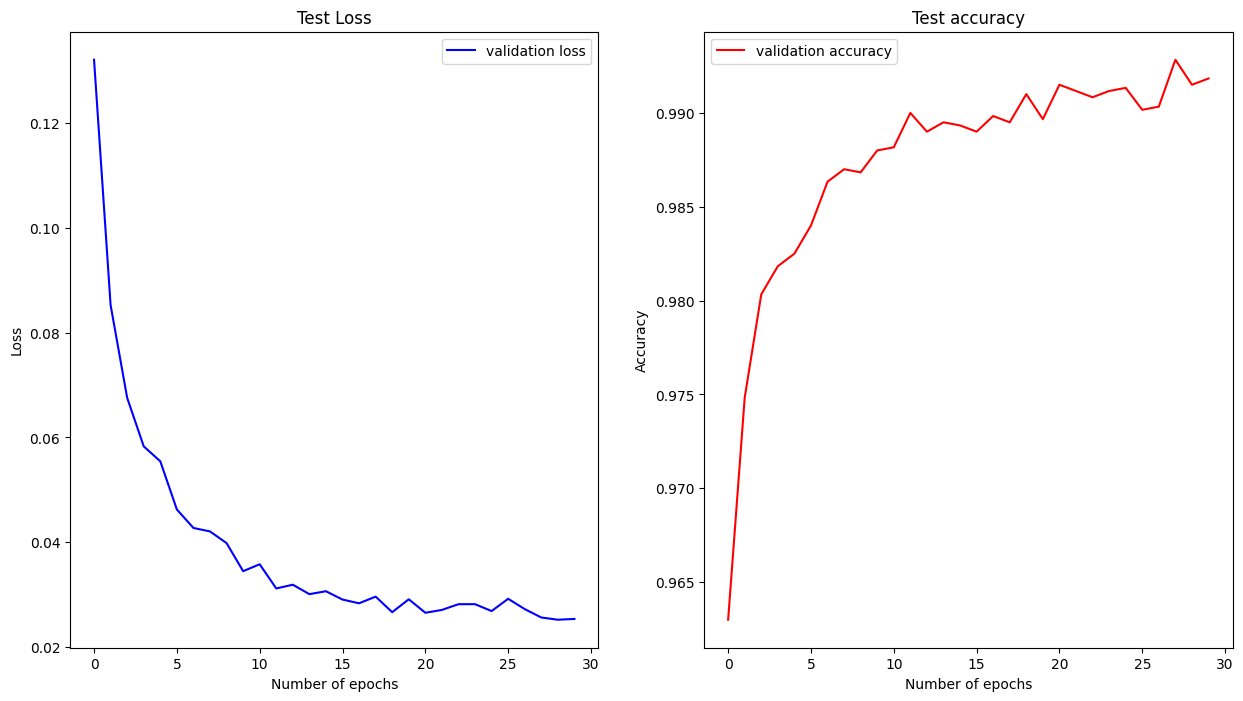

In [56]:
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize=(15,8))
ax = ax.ravel()
#val_loss
ax[0].plot(history1.history['val_loss'],color = 'b',label = 'validation loss')
ax[0].set_title("Test Loss")
ax[0].set(xlabel = "Number of epochs", ylabel = "Loss")
ax[0].legend()

#val_accuracy
ax[1].plot(history1.history['val_accuracy'],color = 'r',label = 'validation accuracy')
ax[1].set_title("Test accuracy")
ax[1].set(xlabel = "Number of epochs", ylabel = "Accuracy")
ax[1].legend()

plt.show()

##Save the model:

In [57]:
from tensorflow.keras.models import load_model

In [58]:
#with h5 file
model.save('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
saved_model = load_model('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model2.h5')

In [60]:
res_of_SModel = saved_model.predict(test)

313/313 [==============================] - 1s 2ms/step


In [61]:
res_of_SModel = np.argmax(res_of_SModel, axis = 1)

Text(0.5, 0.98, 'Result of prediction:')

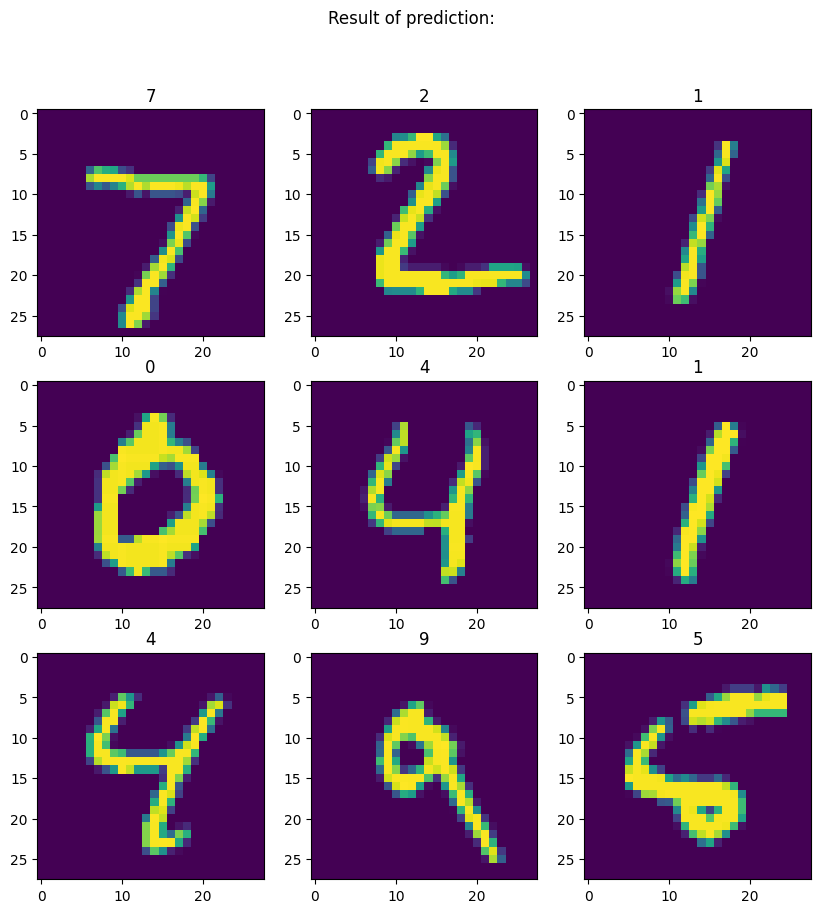

In [62]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(test[i][:,:,0])
  axs[i].set_title(res_of_SModel[i])
fig.suptitle("Result of prediction:")

In [63]:
import pickle

In [64]:
print(pickle.format_version)

4.0


In [65]:
#save model with pickle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model2.pkl','wb') as f:
  pickle.dump(model,f)

In [66]:
#open saved_model with pikle
with open('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data/saved_model2.pkl','rb') as f:
  saved_model_pkl = pickle.load(f)

In [67]:
res_of_SModel_pkl = saved_model_pkl.predict(test)
res_of_SModel_pkl = np.argmax(res_of_SModel_pkl,axis = 1)
print(res_of_SModel_pkl)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


#Test with an image

In [68]:
import cv2

In [69]:
original_img = cv2.imread('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data//test_image.png',1)
img = cv2.imread('/content/drive/MyDrive/Tài liệu học kì 1 năm 3/Open_source/Project/data//test_image.png',0)
# cv2.imshow("picture:",img)
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# cv2.imshow("picture after thresh_gaussian",pic)
ret,pic = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
# cv2.imshow("picture after all processing",pic)

pic = 255-pic
pic_scaled = pic/255.0

pic_scaled = pic.reshape(-1,28,28,1)

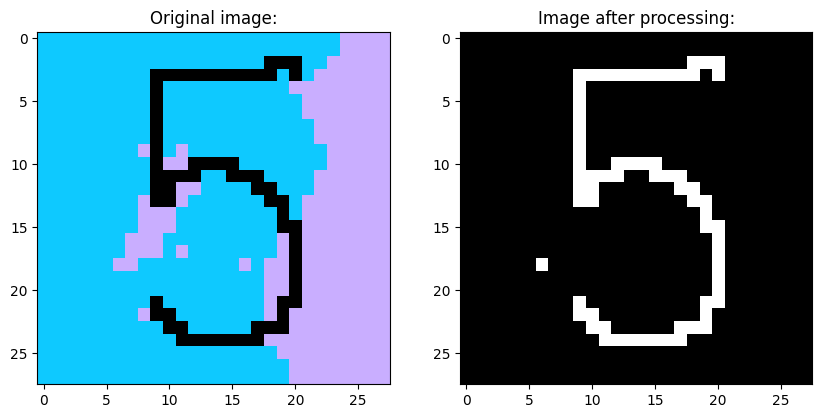

In [ ]:
fig,axis = plt.subplots(nrows = 1, ncols = 2,figsize = (10,8))
ax = axis.ravel()
ax[0].imshow(original_img)
ax[0].set_title("Original image:")

ax[1].imshow(pic,cmap='gray')
ax[1].set_title("Image after processing:")
plt.show()

In [70]:
tmp = saved_model.predict(pic_scaled)
pic_predict = np.argmax(tmp,axis=1)
print(f"Number of prediction: {pic_predict}")
# cv2.waitKey(0)
# cv2.destroyWindow()

1/1 [==============================] - 0s 119ms/step
Number of prediction: [5]
